/home/soud/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


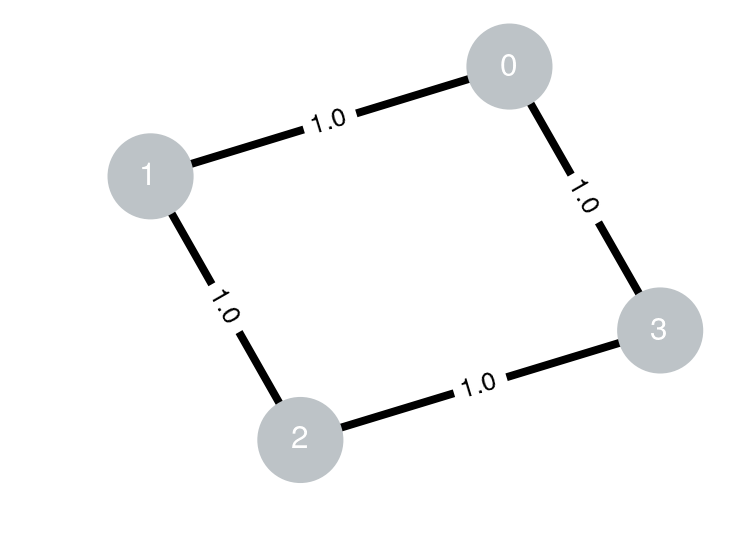

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'''
\usepackage{palatino}
\usepackage{newpxmath}''')

a = '#bdc3c7'

n = 4
V = np.arange(0, n, 1)
E =[(0, 1, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

edge_labels = nx.get_edge_attributes(G, 'weight')
pos = nx.spring_layout(G, seed=5)

plt.subplots(figsize=(4, 3), dpi=190)
default_axes = plt.axes(frameon=False)

nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
nx.draw_networkx(
    G, node_size=1000, alpha=1, ax=default_axes, pos=pos,
    width=3, font_color='#ffffff',
    node_color=[a for _ in V],
)

plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.1*x for x in axis.get_xlim()])
axis.set_ylim([1.1*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qaoa = QuantumCircuit(n, n)
qaoa.h(range(n))
qaoa.barrier()

for k, l in G.edges:
    qaoa.cnot(k, l)
    qaoa.rz(3, l)
    qaoa.cnot(k, l)
    qaoa.barrier()

qaoa.rx(2, range(n))
a = qaoa.draw(output='latex_source')
print(a)

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 5, img_depth = 21
\usepackage[size=custom,height=10,width=40,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}

\begin{equation*}
    \Qcircuit @C=1.0em @R=0.0em @!R {
	 	\lstick{ {q}_{0} :  } & \gate{H} \barrier[0em]{3} & \qw & \ctrl{1} & \qw & \ctrl{1} \barrier[0em]{3} & \qw & \ctrl{3} & \qw & \ctrl{3} \barrier[0em]{3} & \qw & \qw & \qw & \qw \barrier[0em]{3} & \qw & \qw & \qw & \qw \barrier[0em]{3} & \qw & \gate{R_x(2)} & \qw & \qw\\
	 	\lstick{ {q}_{1} :  } & \gate{H} & \qw & \targ &